# CCA explore


## Here try to get to grips with CCA

The basic approach is the following. You have two things that have the same underlying dynamics in different subspaces. What I guess you are doing is solving an eigenvalue problem on the cross covariance matrix?? Is that right?

In other way what you do is to do an SVD on both data matrices. Then you


## Interpretation

What is the prediction of the principal angles between movements in different directions...?


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(font_scale=1.5,style='ticks')

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def run_CCA(D1, D2, hat_dims=2):
    
    """
    This code runs canonical correlation analysis. The point here is that
    we want to find rotation matrices that align two separate datasets
    
    Arguments:
    
    D_i:            np.array
                    shape should be n_neurons x n_timeopints
    """
    
    
    #run SVD on datasets to obtain temporal and cellular
    #singular vectors
    U1,S1,Vt1 = np.linalg.svd(D1)
    S1 = np.eye(len(U1),len(Vt1))*S1[:,None]
    U2,S2,Vt2 = np.linalg.svd(D2)
    S2 = np.eye(len(U2),len(Vt2))*S2[:,None]

    
   
    #select the top 'hat_dims' cellular singular vectors
    Uhat1 = U1[:,:hat_dims]
    Uhat2 = U2[:,:hat_dims]
    
    #I1= Uhat1.T.dot(U1)
    
    #This is the covariance between each cellular singular vector
    #and the corresponding data matrix
    L1 = Uhat1.T.dot(D1)   
    L2 = Uhat2.T.dot(D2)
    
    
    Q1,R1 = Vt1[:hat_dims].T,S1[:hat_dims,:hat_dims]
    Q2,R2 = Vt2[:hat_dims].T,S2[:hat_dims,:hat_dims]
    
    
    
    #this dot product defines the correlations between the different axes
    #identified for the neural modes. What SVD will do is 
    Ub,Sb,Vtb = np.linalg.svd(np.dot(Q1.T,Q2))
    
    
    #These are rotation matrices that rotate the data matrices into
    #the common subspace
    M1 = np.linalg.inv(R1).dot(Ub)
    M2 = np.linalg.inv(R2).dot(Vtb)
    
    results_dict = {'U1': U1,
                    'U2': U2,
                    'V1': V1,
                    'V2': V2,
                    'S1': S1,
                    'S2': S2,
                    'L1': L1,
                    'L2': L2,
                    'M1': M1,
                    'M2': M2}
    
    return results_dict

In [ ]:
def compute_angles_between_hyperplanes(results_dict):
    return None

In [ ]:
def run_roll_CCA(D1,D2):
    
    for roll_ix in range(9):
        res_dict = run_CCA(D1,np.roll(D2,i,axis=1))
        comput

In [ ]:
def run_CCA_all(ROOT):
    """ Loop over all sessions"""
    
    for pth_ in os.listdir(ROOT):
        path = os.path.join(ROOT,pth_)
        
        

In [32]:
n_neurons = 120
n_timepoints = 200
n_dims = 2

dyn_mtx = np.random.normal(size=(n_dims,n_timepoints))

In [33]:
P1 = np.random.normal(size=(n_neurons,n_dims))
P2 = np.random.normal(size=(n_neurons,n_dims))

In [34]:
D1 = np.dot(P1,dyn_mtx)
D2 = np.dot(P2,dyn_mtx)

In [35]:
U1,S1,Vt1 = np.linalg.svd(D1)
S1 = np.eye(len(U1),len(Vt1))*S1[:,None]
U2,S2,Vt2 = np.linalg.svd(D2)
S2 = np.eye(len(U2),len(Vt2))*S2[:,None]


In [36]:
D1.shape

(120, 200)

(0, 50)

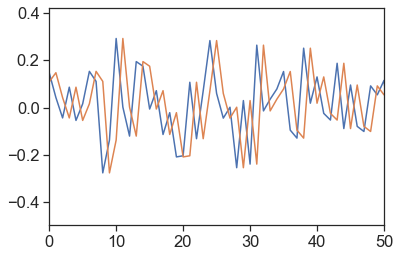

In [38]:
plt.plot(np.mean(D1,axis=0))
plt.plot(np.mean(np.roll(D1,1,axis=1),axis=0))
plt.xlim(0,50)

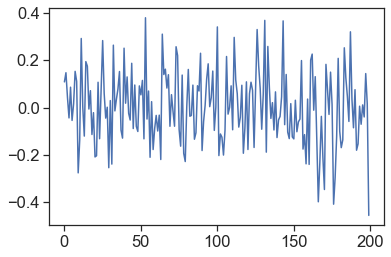

In [39]:
plt.plot(np.mean(np.roll(D1,1,axis=1),axis=0))

In [40]:
hat_dims = 2

Uhat1 = U1[:,:hat_dims]
Uhat2 = U2[:,:hat_dims]

In [41]:
I1= Uhat1.T.dot(U1)

In [42]:
L1 = Uhat1.T.dot(D1)
L2 = Uhat2.T.dot(D2)

In [43]:
#test1
#np.allclose(Uhat1.T.dot(D1),(np.dot(I1,S1.dot(Vt1))))

In [44]:
#L = np.dot(Uhat1,Uhat1.T).dot(S1).dot(Vt1)
Q1,R1 = Vt1[:hat_dims].T,S1[:hat_dims,:hat_dims]
Q2,R2 = Vt2[:hat_dims].T,S2[:hat_dims,:hat_dims]

In [45]:
R1.shape

(2, 2)

In [46]:
#Ub and Vtb are rotation matrices
Ub,Sb,Vtb = np.linalg.svd(np.dot(Q1.T,Q2))

In [47]:
#These are rotation matricesb

M1 = np.linalg.inv(R1).dot(Ub)
M2 = np.linalg.inv(R2).dot(Vtb)

In [48]:
#np.allclose(np.dot(M1,L1)[0],np.dot(M2,L2)[0])

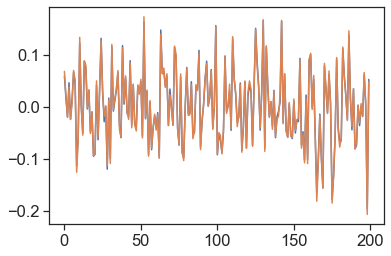

In [49]:
#yes
plt.plot(np.dot(M1,L1)[0])
plt.plot(np.dot(M2,L2)[0])

In [50]:
L1.shape

(2, 200)

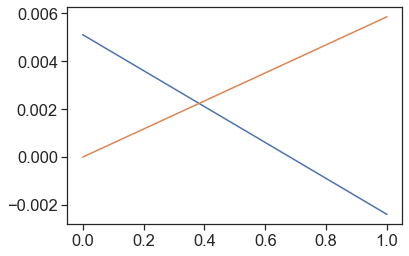

In [30]:
plt.plot(np.dot(np.linalg.pinv(R1.T),Ub)[0])
plt.plot(-np.dot(np.linalg.pinv(R2.T),Vtb.T)[0])

In [31]:
Vt1.shape

(200, 200)